# Automated Bingo Game

### Create a method that returns a list with size * size random unique numbers between 0 and maximum

With this definition:

        def generar_carton(size, maximum)

For example:

        card = generar_carton(3, 20)
        print(card)
        [6, 4, 15, 8, 18, 1, 11, 17, 3]

In [27]:
import random
def generar_carton(size, maximum):
    numeros=list(range(1,int(maximum)+1))
    random.shuffle(numeros)
    return numeros[:size**2]

In [1]:
import random

def generar_carton(size, maximum):
    if size*size>maximum:
        print("Error, not enough numbers for your card")
        return []
    else:
        return random.sample(range(0, maximum), size*size)

In [2]:
generar_carton(4, 100)

[34, 62, 82, 4, 89, 94, 98, 84, 41, 30, 93, 72, 87, 40, 88, 24]

### Create a method that plots a bingo play card with an X in every matched number

With this definition:

        def imprime_carton(card, numbers)
        
Where "card" is the generated list with random numbers from previous step and "numbers" is a list with the number_balls that have already being popped out from the bingo drum. This function does not return anything only prints the card.

For example:

        imprime_carton([6, 4, 15, 8, 18, 1, 11, 17, 3], [])

        |  6|  4| 15|
        |  8| 18|  1|
        | 11| 17|  3|
        
        imprime_carton([6, 4, 15, 8, 18, 1, 11, 17, 3], [1,2,3,4,5,6,7,8])
        
        |  X|  X| 15|
        |  X| 18|  X|
        | 11| 17|  X|

In [49]:
#Forma 1
size=3
cartas_vistas=[1,2,3,4,5,6,7,8,9,10]
numeros=generar_carton(size,20)
print('|',end='')
v=0
for i in numeros:
    if v ==size:
        print('\n',end='|')
        v=0
    if i in cartas_vistas:
        print("{:>2s}".format('X'),end='|')
    else:
        print("{:>2s}".format(str(i)),end='|')
    v+=1

| X| X| X|
|11|19| X|
|17| X|12|

In [2]:
import numpy as np
def imprime_carton(card,numbers):
    side=int(np.sqrt(len(card)))
    index=0
    for row in range(side):
        for col in range(side):
            if card[index] not in numbers:
                print("|%3d" % card[index],end="")
            else:
                print("|%3s" % "X",end="")
            index+=1
        print("|")

### Create a method that simulates the Bing drum

With this definition:

        def simulate_drum(maximum,numbers)
        
Where "maximum" is the maximum value we are playing with and "numbers" is a list with all the number_balls that have already being popped out from the bingo drum. It must return a number that is in the Bingo drum (not any fo the numbers that have already being popped out)

For example:

        new_ball=simulate_drum(20, [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17])
        print(new_ball)
        19

In [3]:
def simulate_drum(maximum,numbers):
    available=list(range(0,maximum))
    for i in numbers:
        available.remove(i)
    return random.sample(available,1)[0]
    

### Create a method that returns True when all the numbers in the Bingo Play Card have allready beoing popped out

With this definition:

        def finished(card,numbers)
        
Where "card" is the generated list with random numbers and "numbers" is a list with all the number_balls that have already being popped out from the bingo drum. It must return TRUE if the play card is complete or FALSE otherwise.

In [4]:
def finished(card,numbers):
    match=[]
    for i in card:
        if i in numbers:
            match.append(True)
    if len(match)==len(card):
        return True
    else:
        return False

### Test and understand this method to play the game

In [5]:
def play_game(size,maximum):
    numbers_from_the_drum=[]
    balls=0
    card=generar_carton(size, maximum)
    imprime_carton(card,numbers_from_the_drum)
    while not finished(card,numbers_from_the_drum):
        new_ball=simulate_drum(maximum,numbers_from_the_drum)
        balls=balls+1
        print("New Number: ",new_ball)
        numbers_from_the_drum.append(new_ball)
        print("Updated Play Card: ")
        imprime_carton(card,numbers_from_the_drum)
    return balls

In [ ]:
size=int(input("Get Size: "))
maximum=int(input("Get Maximum: "))
play_game(size,maximum)

### Create a version of the previous method with no printouts

With this definition:
    
        def play_game_no_display(size,maximum)

In [6]:
def play_game_no_display(size,maximum):
    numbers_from_the_drum=[]
    balls=0
    card=generar_carton(size, maximum)
    while not finished(card,numbers_from_the_drum):
        new_ball=simulate_drum(maximum,numbers_from_the_drum)
        balls=balls+1
        numbers_from_the_drum.append(new_ball)
    return balls

### Create python script that simulates a game for card sizes from 1 to 9 with 100 balls in the Bingo drum that simulates 10 games per size. It must compute the average of the number of balls required to complete the card for every size.

You must finished with an X vector like this [1,2,3,4,5,6,7,8,9]
And a Y vector with the average number of balls required for 10 repetitions of a Bing game for each size

Plot the evolution of "Average number of balls required" Vs "Card size"

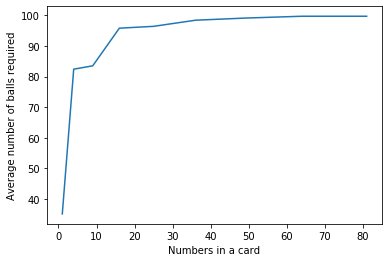

In [8]:
import matplotlib.pyplot as plt

balls=[]
maximum=100
for size in range(1,10):
    repetition=[]
    for repetitions in range(10):
        num=play_game_no_display(size,maximum)
        repetition.append(num)
    balls.append(np.mean(repetition))
plt.plot(np.linspace(1,9,9)**2,balls) 
plt.xlabel("Numbers in a card")
plt.ylabel("Average number of balls required")
plt.show()